In [1]:
import sys
sys.path.append('../scripts')

import numpy as np
import pandas as pd

from yahoo_stock_data import YahooStockData
from data_handler import DataHandler
from arima import AlgoARIMA

In [6]:
START_DATE = '2000-01-01'
TARGET     = 'High'
TIMEFRAME  = -1
LOG_RETURN = True
TEST_SIZE  = 0.2

ticker = 'MSFT'

si_from_yahoo = YahooStockData(ticker)
si_data = si_from_yahoo.get_data(START_DATE)
si_data.reset_index(inplace=True)
# si_data.to_csv('MSFT.csv', index=False)
# si_data = pd.read_csv('MSFT.csv')

[*********************100%***********************]  1 of 1 completed


In [3]:
data_handler = DataHandler(si_data, TARGET, TIMEFRAME, LOG_RETURN, TEST_SIZE)
algo_arima = AlgoARIMA(data_handler.y_train)
forecasts = algo_arima.get_forecasts(len(data_handler.y_val) + len(data_handler.y_test))

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-21741.632, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22873.272, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-24593.562, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-21743.632, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-24595.951, Time=1.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-24489.012, Time=1.78 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-24594.706, Time=1.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-24595.971, Time=1.52 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-24497.129, Time=0.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-24462.339, Time=0.81 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-24598.984, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-24596.440, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-24596.769, Time=0.56 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-24598.242, Time=0.51 sec
 ARIM

 This problem is unconstrained.



At iterate   20    f= -2.75146D+00    |proj g|=  1.25205D+00

At iterate   25    f= -2.76845D+00    |proj g|=  2.88510D-01

At iterate   30    f= -2.76896D+00    |proj g|=  8.10684D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     50      1     0     0   1.641D-03  -2.769D+00
  F =  -2.7689606424083357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


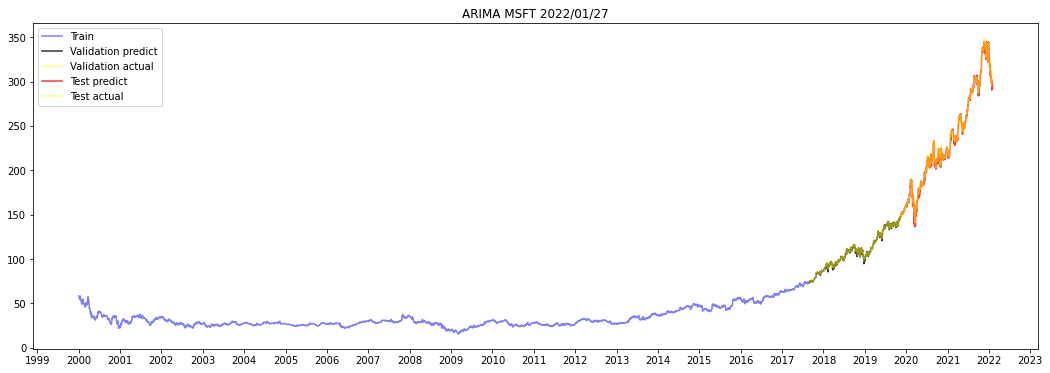


Predicted value: 301.8199576581599


,mse,mae,rmse,mape
Test Results,11.432378,2.273907,3.38118,0.010486


In [7]:
forecast, val_results, test_results = data_handler.process_forecasts(forecasts, plot_title=f'ARIMA {ticker}')
print()
print("Predicted value:", forecast[-1])
pd.DataFrame(test_results, index=['Test Results'])